# Computer Vision
#### Non-maxima suppression, threshold-and-linking

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

plt.rc('figure', figsize=[8,8]) # set a bigger default figure size
plt.rc('image', cmap='gray') # set the default color-map of plt.image() to 'gray'

dtype('float32')

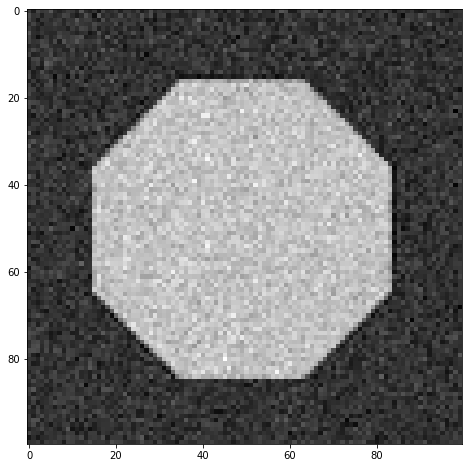

In [4]:
img = plt.imread('test100x100.png',0)
img += np.random.randn(img.shape[0],img.shape[1]) * 0.05 # lets add some extra noise..
img *= 255
plt.imshow(img)
img.dtype

In [5]:
# Calc image gradients:

Sx = np.array([[-1,0,1],[-2,0,2],[-1,0,1]]) 
Sy = Sx.T

Gx = cv2.filter2D(img, cv2.CV_32F, Sx)  
Gy = cv2.filter2D(img, cv2.CV_32F, Sy)

G = np.sqrt(Gx**2 + Gy**2)  # another option: G = np.hypot(Gx,Gy)
theta = np.arctan2(Gy,Gx) / np.pi * 180

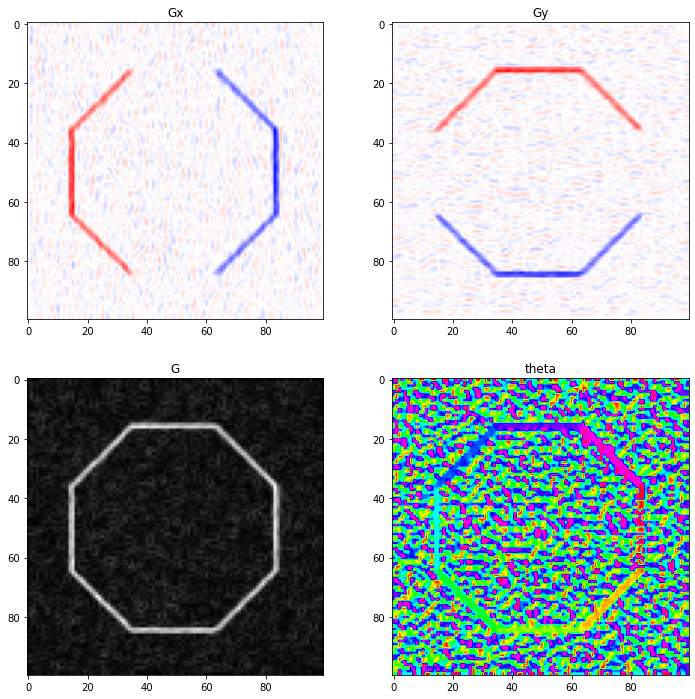

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(Gx,cmap='bwr', vmin=-G.max(), vmax=G.max())
plt.title('Gx')

plt.subplot(2,2,2)
plt.imshow(Gy,cmap='bwr', vmin=-G.max(), vmax=G.max())
plt.title('Gy')

plt.subplot(2,2,3)
plt.imshow(G)
plt.title('G')

plt.subplot(2,2,4)
plt.imshow(theta, cmap='hsv')
plt.title('theta')
plt.show()

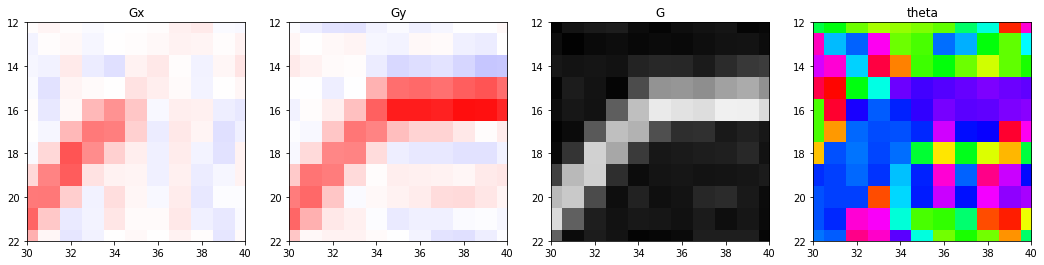

In [7]:
zoom = [30,40,22,12]

plt.figure(figsize=(18,18))
plt.subplot(1,4,1)
plt.imshow(Gx,cmap='bwr', vmin=-G.max(), vmax=G.max())
plt.title('Gx')
plt.axis(zoom)

plt.subplot(1,4,2)
plt.imshow(Gy,cmap='bwr', vmin=-G.max(), vmax=G.max())
plt.title('Gy')
plt.axis(zoom)

plt.subplot(1,4,3)
plt.imshow(G,cmap='gray')
plt.title('G')
plt.axis(zoom)

plt.subplot(1,4,4)
plt.imshow(theta, cmap='hsv')
plt.title('theta')
plt.axis(zoom)
plt.show()

(30.0, 40.0, 22.0, 12.0)

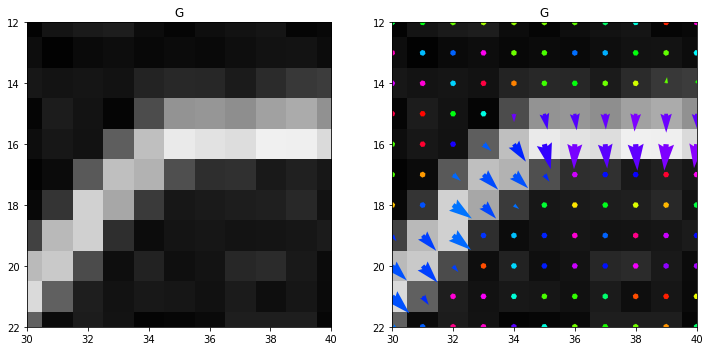

In [8]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(G,cmap='gray')
plt.title('G')
plt.axis(zoom)


plt.subplot(1,2,2)
plt.imshow(G,cmap='gray')
plt.quiver(Gx/255,Gy/255, theta, angles='xy', scale_units='xy', scale=3,  cmap='hsv', clim=(-180,180), width=0.02)
plt.title('G')
plt.axis(zoom)

In [9]:
import numpy as np

def nms(G, theta):
    size = G.shape
    G_nms = np.zeros(size)
    for i in range(1, size[0] - 1):
        for j in range(1, size[1] - 1):
            if ((-180 <= theta[i, j] < -157.5) or (-22.5 <= theta[i, j] < 0)
                or (0 <= theta[i, j] < 22.5) or (157.5 <= theta[i, j] <= 180)):
                bpix = G[i, j - 1]
                apix = G[i, j + 1]
            elif ((-67.5 <= theta[i, j] < -22.5) or (112.5 <= theta[i, j] < 157.5)):
                bpix = G[i + 1, j - 1]
                apix = G[i - 1, j + 1]
            elif ((67.5 <= theta[i, j] < 112.5) or (-112.5 <= theta[i, j] < -67.5)):
                bpix = G[i - 1, j]
                apix = G[i + 1, j]
            elif ((22.5 <= theta[i, j] < 67.5) or (-157.5 <= theta[i, j] < -112.5)):
                bpix = G[i - 1, j - 1]
                apix = G[i + 1, j + 1]

            if ((G[i, j] >= bpix) and (G[i, j] >= apix)):
                G_nms[i, j] = G[i, j]
    return G_nms

In [10]:

G = np.sqrt(Gx**2 + Gy**2)  # another option: G = np.hypot(Gx,Gy)
theta = np.arctan2(Gy,Gx) / np.pi * 180
GNMS = nms(G,theta)


(30.0, 40.0, 22.0, 12.0)

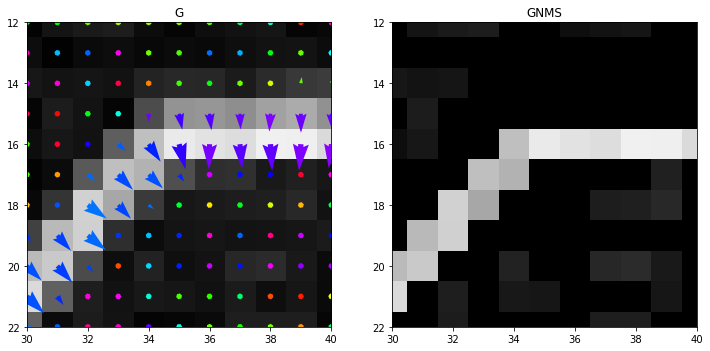

In [11]:
zoom = [30,40,22,12]
plt.figure(figsize=(12,12))

plt.subplot(122)
plt.imshow(GNMS)
plt.title('GNMS')
plt.axis(zoom)

plt.subplot(121)
plt.imshow(G)
plt.quiver(Gx/255,Gy/255, theta, angles='xy', scale_units='xy', scale=3,  cmap='hsv', clim=(-180,180), width=0.02)
plt.title('G')
plt.axis(zoom)

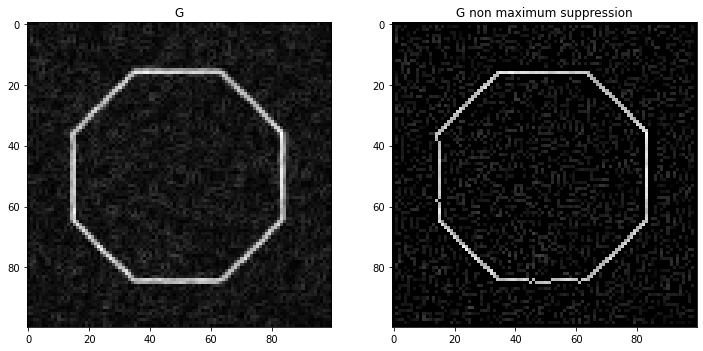

In [12]:
plt.figure(figsize=(12,12))

plt.subplot(1,2,1)
plt.imshow(G)
plt.title('G')

plt.subplot(1,2,2)
plt.imshow(GNMS)
plt.title('G non maximum suppression');

In [13]:
def thresh_and_link(G_nms, th_low, th_high):
    rows, cols = G_nms.shape[0], G_nms.shape[1]
    edges = np.zeros_like(G_nms)

    for i in range(1, rows):
        for j in range(1, cols):

            if (G_nms[i, j] >= th_high):
                edges[i, j] = 255
            elif (G_nms[i, j] <= th_low):
                edges[i, j] = 0;
            elif (th_low < G_nms[i, j] < th_high):
                if ((G_nms[i - 1, j] >= th_high) or (G_nms[i + 1, j] >= th_high) or (G_nms[i + 1, j + 1] >= th_high) or
                        (G_nms[i - 1, j - 1] >= th_high) or (G_nms[i - 1, j + 1] >= th_high) or (
                                G_nms[i + 1, j - 1] >= th_high) or
                        (G_nms[i, j + 1] >= th_high) or (G_nms[i, j - 1] >= th_high)):
                    edges[i, j] = 255

    return edges

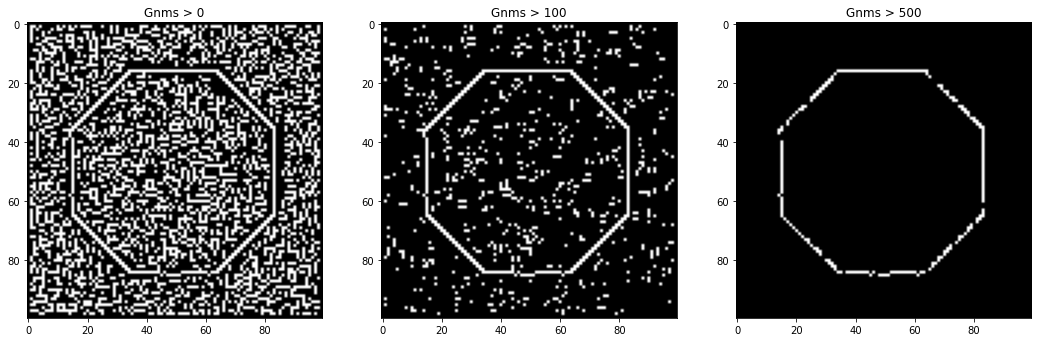

In [14]:
plt.figure(figsize=(18,10))

th0, low_th, high_th = 0,100,500

plt.subplot(1,3,1)
plt.imshow(GNMS>th0)
plt.title(f'Gnms > {th0}')

plt.subplot(1,3,2)
plt.imshow(GNMS>low_th)
plt.title(f'Gnms > {low_th}')

plt.subplot(1,3,3)
plt.imshow(GNMS>high_th)
plt.title(f'Gnms > {high_th}')

plt.show()


In [15]:
strong = (GNMS>=high_th)
weak = (low_th<GNMS) * (GNMS<high_th)

M = np.zeros_like(G)
M[weak] = 100  
M[strong] = 255

plt.imshow(M)

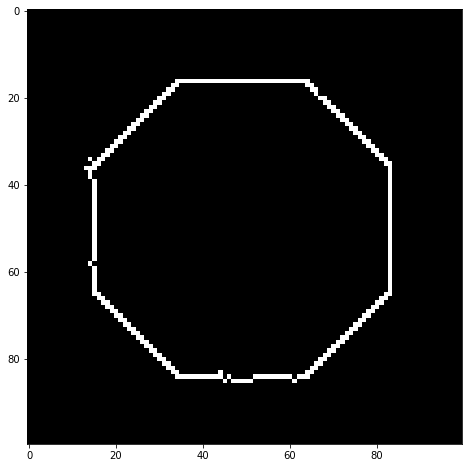

In [16]:
edges = thresh_and_link(GNMS, low_th, high_th)
plt.imshow(edges)

In [17]:
plt.subplot(1,3,1)
plt.imshow(G)
plt.title('G')
plt.axis(zoom)

plt.subplot(1,3,2)
plt.imshow(GNMS)
plt.title('GNMS')
plt.axis(zoom)

plt.subplot(1,3,3)
plt.imshow(edges)
plt.title('EDGES')
plt.axis(zoom)

(30.0, 40.0, 22.0, 12.0)

In [18]:
plt.figure(figsize=(10,8))

img = cv2.imread('shape_noise.png',0)

plt.imshow(img, cmap='gray')
plt.colorbar()

In [19]:
Gx = cv2.filter2D(img, cv2.CV_32F, Sx)
Gy = cv2.filter2D(img, cv2.CV_32F, Sy)

G = np.sqrt(Gx**2 + Gy**2) 
theta = np.arctan2(Gy,Gx) / np.pi * 180

In [20]:
plt.figure(figsize=(16,6))

GNMS = nms(G,theta)

plt.subplot(1,2,1)
plt.imshow(G)
plt.colorbar()
plt.title('G')

plt.subplot(1,2,2)
plt.imshow(GNMS)
plt.colorbar()
plt.title('G_nms');

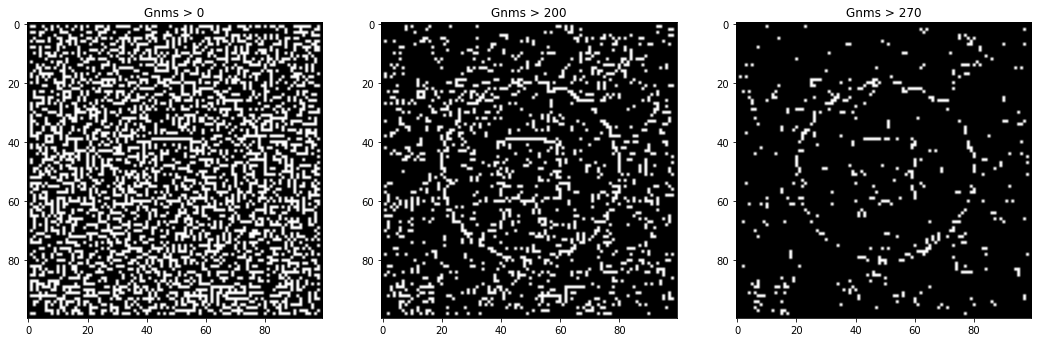

In [21]:
plt.figure(figsize=(18,10))

th0, low_th, high_th = 0,200,270

plt.subplot(1,3,1)
plt.imshow(GNMS>th0)
plt.title(f'Gnms > {th0}')

plt.subplot(1,3,2)
plt.imshow(GNMS>low_th)
plt.title(f'Gnms > {low_th}')

plt.subplot(1,3,3)
plt.imshow(GNMS>high_th)
plt.title(f'Gnms > {high_th}')

plt.show()

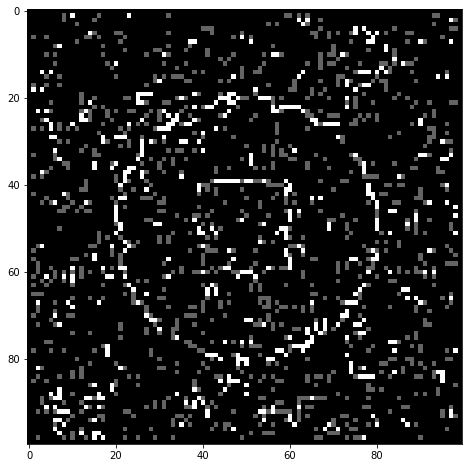

In [22]:
strong = (GNMS>=high_th)
weak = (low_th<GNMS)*(GNMS<high_th)

M = np.zeros_like(G)
M[weak] = 100  
M[strong] = 255

plt.imshow(M)

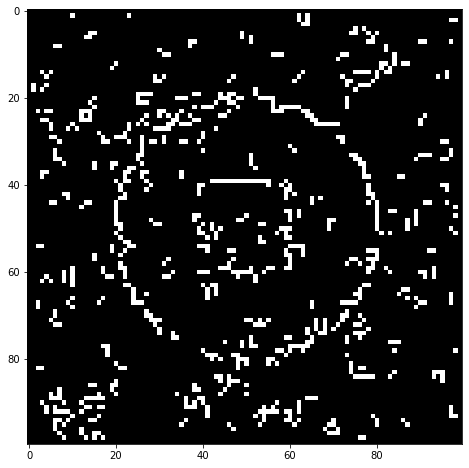

In [23]:
edges = thresh_and_link(GNMS, low_th, high_th)
plt.imshow(edges)

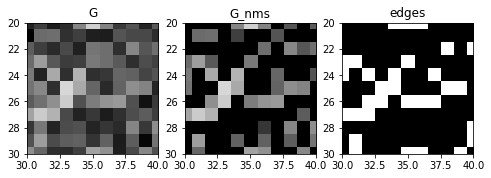

In [24]:
zoom = [30,40,30,20]


plt.subplot(1,3,1)
plt.imshow(G)
plt.title('G')
plt.axis(zoom)

plt.subplot(1,3,2)
plt.imshow(GNMS)
plt.title('G_nms')
plt.axis(zoom)

plt.subplot(1,3,3)
plt.imshow(edges)
plt.title('edges')
plt.axis(zoom)
plt.show()

In [25]:
blur = cv2.GaussianBlur(img,(0,0),3)
Gx = cv2.filter2D(blur, cv2.CV_32F, Sx)  
Gy = cv2.filter2D(blur, cv2.CV_32F, Sy)

G = np.sqrt(Gx**2 + Gy**2)
theta = np.arctan2(Gy,Gx) / np.pi * 180

GNMS = nms(G,theta)


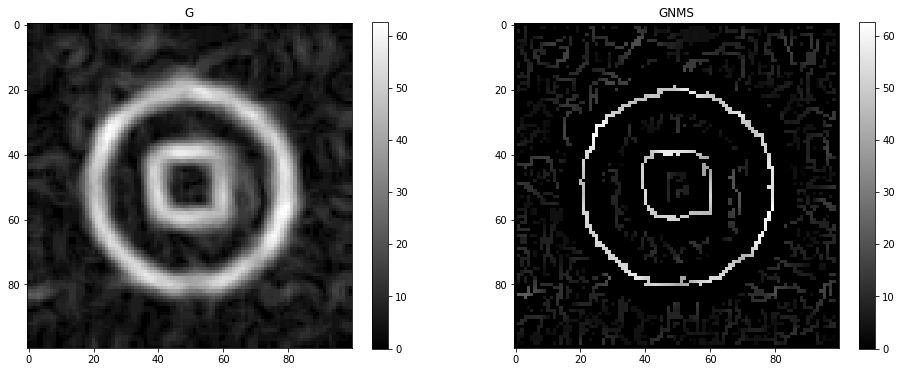

In [26]:
plt.figure(figsize=(16,6))

plt.subplot(1,2,1)
plt.imshow(G)
plt.colorbar()
plt.title('G')

plt.subplot(1,2,2)
plt.imshow(GNMS)
plt.colorbar()
plt.title('GNMS');


(30.0, 40.0, 30.0, 20.0)

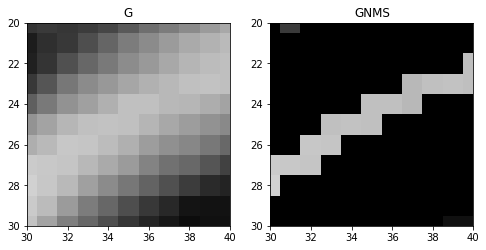

In [27]:
plt.subplot(121)
plt.imshow(G)
plt.title('G')
plt.axis(zoom)

plt.subplot(122)
plt.imshow(GNMS)
plt.title('GNMS')
plt.axis(zoom)

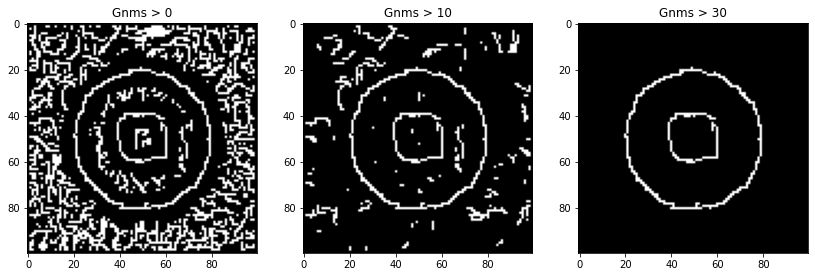

In [28]:
plt.figure(figsize=(14,8))

th0, low_th, high_th = 0,10,30

plt.subplot(1,3,1)
plt.imshow(GNMS>th0)
plt.title(f'Gnms > {th0}')

plt.subplot(1,3,2)
plt.imshow(GNMS>low_th)
plt.title(f'Gnms > {low_th}')

plt.subplot(1,3,3)
plt.imshow(GNMS>high_th)
plt.title(f'Gnms > {high_th}')

plt.show()

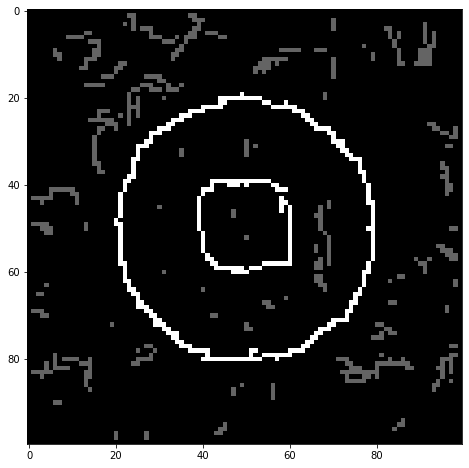

In [29]:
strong = (GNMS>=high_th)
weak = (low_th<GNMS)*(GNMS<high_th)

M = np.zeros_like(G)
M[weak] = 100  
M[strong] = 255

plt.imshow(M)

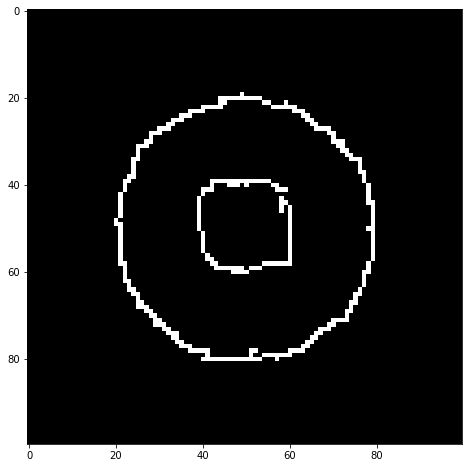

In [30]:
edges = thresh_and_link(GNMS, low_th, high_th)
plt.imshow(edges)

### Elephant image


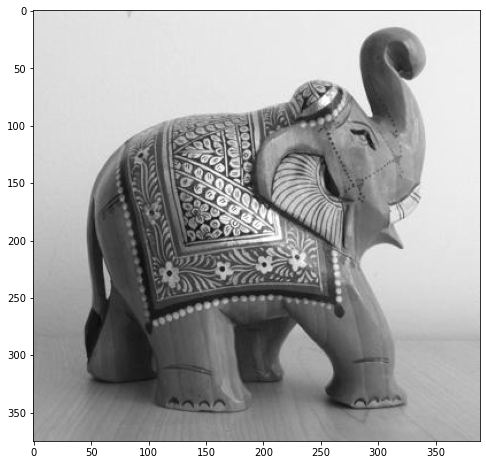

In [31]:
img = cv2.imread('elephant.jpg',0)
plt.imshow(img);


In [32]:
Gx = cv2.filter2D(img, cv2.CV_32F, Sx)
Gy = cv2.filter2D(img, cv2.CV_32F, Sy)

G = np.sqrt(Gx**2 + Gy**2) 
theta = np.arctan2(Gy,Gx) / np.pi * 180

In [33]:
realGNMS = nms(G,theta)


Text(0.5, 1.0, 'G-NMS')

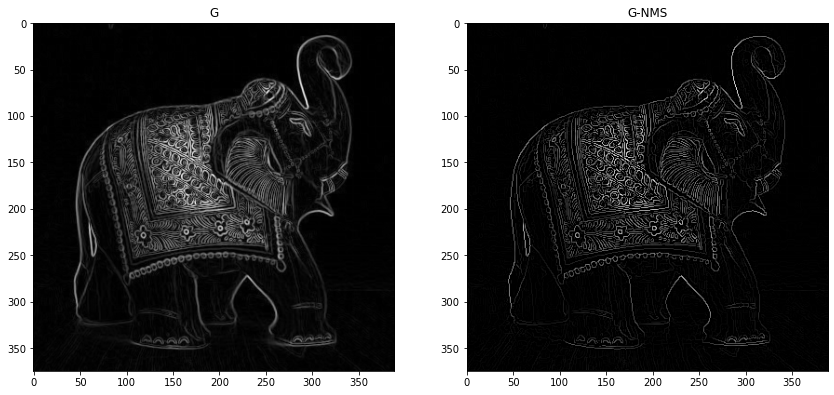

In [34]:
plt.figure(figsize=(22,8))
plt.subplot(1,3,1)
plt.imshow(G)
plt.title('G')

plt.subplot(1,3,2)
plt.imshow(realGNMS)
plt.title('G-NMS')


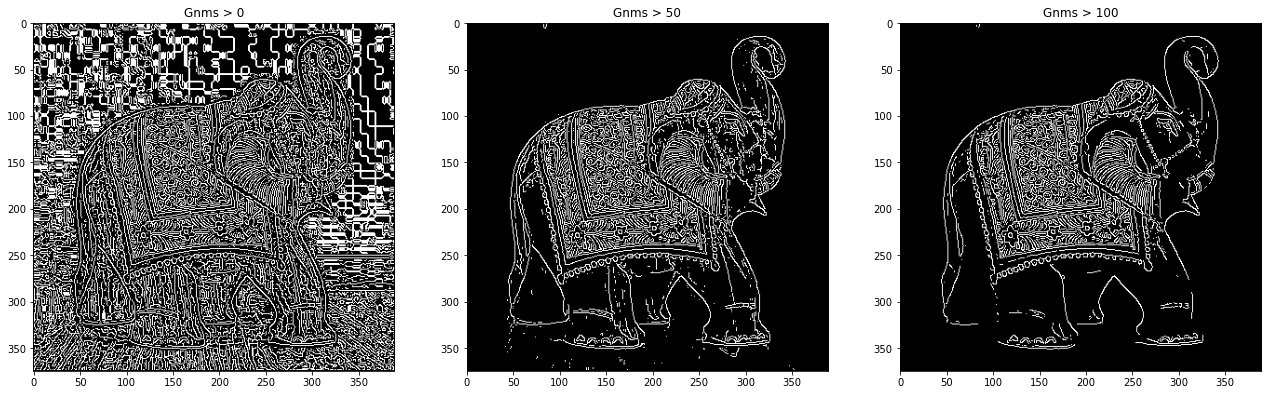

In [35]:
plt.figure(figsize=(22,12))

th0, low_th, high_th = 0,50,100

plt.subplot(1,3,1)
plt.imshow(realGNMS>th0)
plt.title(f'Gnms > {th0}')

plt.subplot(1,3,2)
plt.imshow(realGNMS>low_th)
plt.title(f'Gnms > {low_th}')

plt.subplot(1,3,3)
plt.imshow(realGNMS>high_th)
plt.title(f'Gnms > {high_th}')

plt.show()

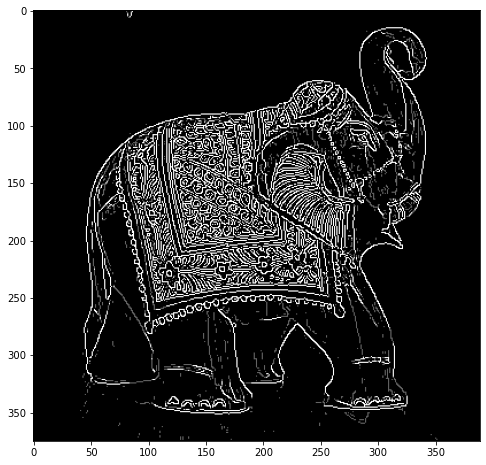

In [36]:
strong = (realGNMS>=high_th)
weak = (low_th<realGNMS)*(realGNMS<high_th)

M = np.zeros_like(G)
M[weak] = 100  
M[strong] = 255

plt.imshow(M)

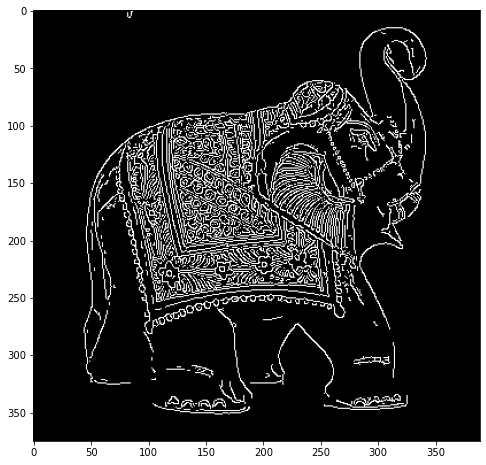

In [37]:
edges = thresh_and_link(realGNMS, low_th, high_th)
plt.imshow(edges)

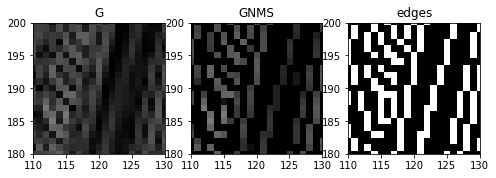

In [38]:
zoom=[110,130,180,200]
plt.subplot(131)
plt.imshow(G)
plt.title('G')
plt.axis(zoom)

plt.subplot(132)
plt.imshow(realGNMS)
plt.title('GNMS')
plt.axis(zoom)

plt.subplot(133)
plt.imshow(edges)
plt.title('edges')
plt.axis(zoom)
plt.show()

### Lena image


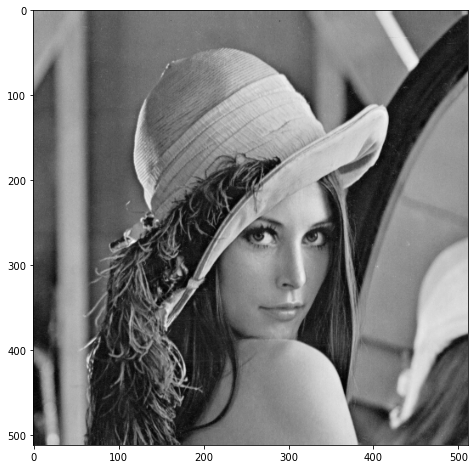

In [44]:
img = plt.imread('Lenna.png',0)
plt.imshow(img)

In [45]:
blur = cv2.GaussianBlur(img,(0,0),3)
Gx = cv2.filter2D(blur, cv2.CV_32F, Sx)
Gy = cv2.filter2D(blur, cv2.CV_32F, Sy)

G = np.sqrt(Gx**2 + Gy**2) 
theta = np.arctan2(Gy,Gx) / np.pi * 180

In [46]:
realGNMS = nms(G,theta)

Text(0.5, 1.0, 'G-NMS')

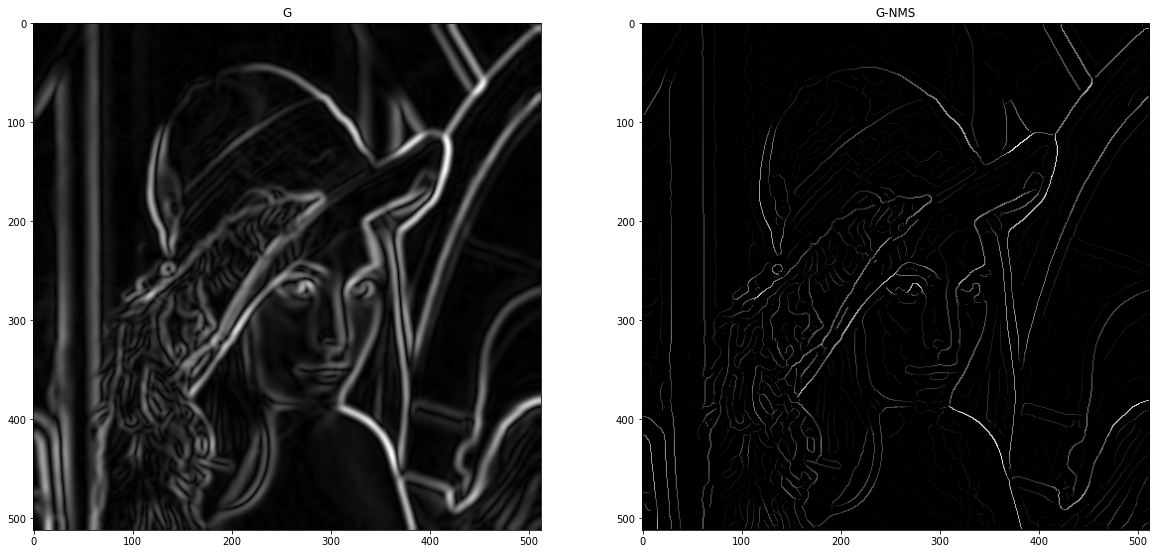

In [47]:
plt.figure(figsize=(20,16))
plt.subplot(1,2,1)
plt.imshow(G)
plt.title('G')

plt.subplot(1,2,2)
plt.imshow(realGNMS)
plt.title('G-NMS')

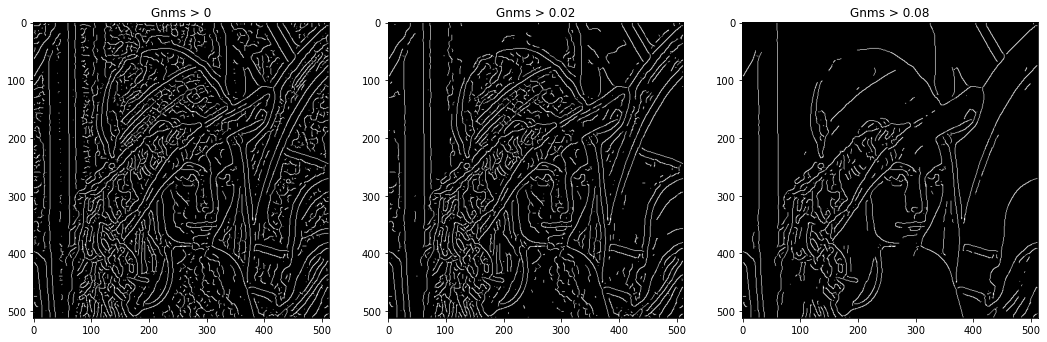

In [48]:
plt.figure(figsize=(18,8))

th0, low_th, high_th = 0, 0.02, 0.08

plt.subplot(1,3,1)
plt.imshow(realGNMS>th0)
plt.title(f'Gnms > {th0}')

plt.subplot(1,3,2)
plt.imshow(realGNMS>low_th)
plt.title(f'Gnms > {low_th}')

plt.subplot(1,3,3)
plt.imshow(realGNMS>high_th)
plt.title(f'Gnms > {high_th}')

plt.show()

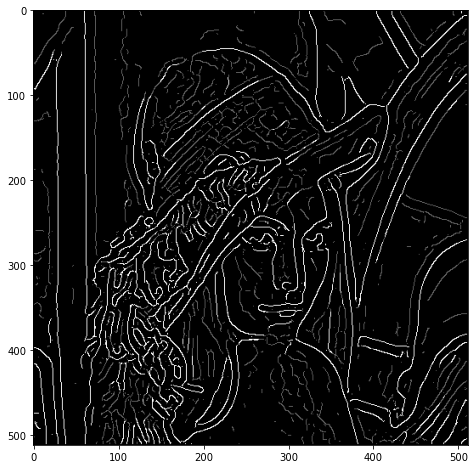

In [49]:
strong = (realGNMS>=high_th)
weak = (low_th<realGNMS)*(realGNMS<high_th)

M = np.zeros_like(G)
M[weak] = 100  
M[strong] = 255

plt.imshow(M)

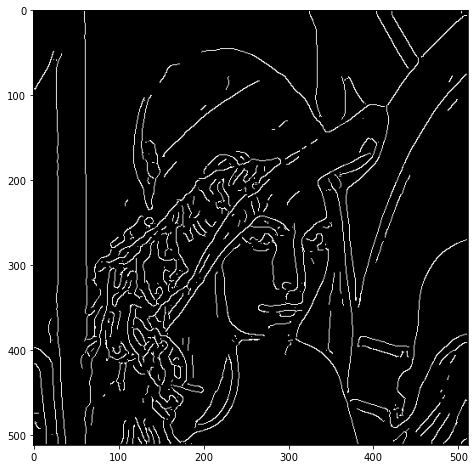

In [50]:
edges = thresh_and_link(realGNMS, low_th, high_th)
plt.imshow(edges)

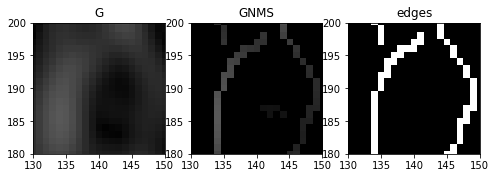

In [51]:
zoom=[130,150,180,200]
plt.subplot(131)
plt.imshow(G)
plt.title('G')
plt.axis(zoom)

plt.subplot(132)
plt.imshow(realGNMS)
plt.title('GNMS')
plt.axis(zoom)

plt.subplot(133)
plt.imshow(edges)
plt.title('edges')
plt.axis(zoom)
plt.show()

### Rice

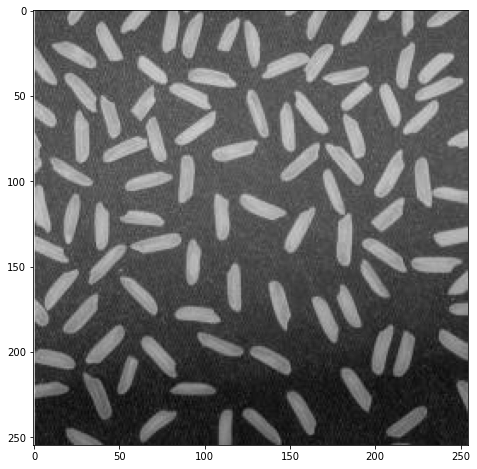

In [52]:
img = plt.imread('rice.jpg',0)
plt.imshow(img)

In [53]:
blur = cv2.GaussianBlur(img,(0,0),2)
Gx = cv2.filter2D(blur, cv2.CV_32F, Sx)
Gy = cv2.filter2D(blur, cv2.CV_32F, Sy)

G = np.sqrt(Gx**2 + Gy**2) 
theta = np.arctan2(Gy,Gx) / np.pi * 180

In [54]:
realGNMS = nms(G,theta)

In [55]:
plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.imshow(G)
plt.title('G')

plt.subplot(1,3,2)
plt.imshow(realGNMS)
plt.title('G-NMS')

Text(0.5, 1.0, 'G-NMS')

In [56]:
plt.figure(figsize=(18,8))

th0, low_th, high_th = 0, 8, 16

plt.subplot(1,3,1)
plt.imshow(realGNMS>th0)
plt.title(f'Gnms > {th0}')

plt.subplot(1,3,2)
plt.imshow(realGNMS>low_th)
plt.title(f'Gnms > {low_th}')

plt.subplot(1,3,3)
plt.imshow(realGNMS>high_th)
plt.title(f'Gnms > {high_th}')

plt.show()

In [57]:
strong = (realGNMS>=high_th)
weak = (low_th<realGNMS)*(realGNMS<high_th)

M = np.zeros_like(G)
M[weak] = 100  
M[strong] = 255

plt.imshow(M)

In [58]:
edges = thresh_and_link(realGNMS, low_th, high_th)
plt.imshow(edges)

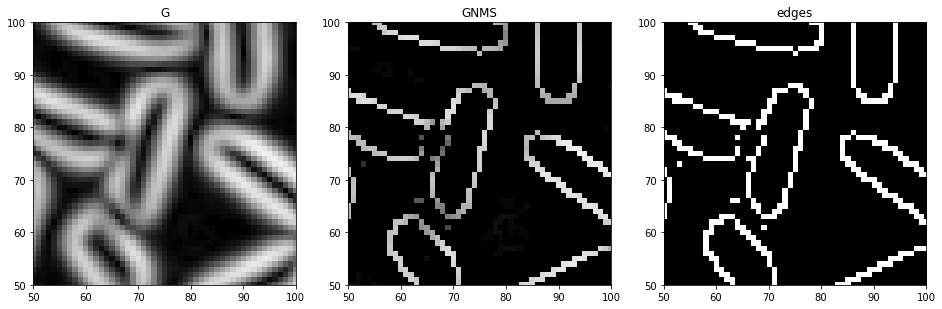

In [59]:
plt.figure(figsize=(16,6))
zoom=[50,100,50,100]
plt.subplot(131)
plt.imshow(G)
plt.title('G')
plt.axis(zoom)

plt.subplot(132)
plt.imshow(realGNMS)
plt.title('GNMS')
plt.axis(zoom)

plt.subplot(133)
plt.imshow(edges)
plt.title('edges')
plt.axis(zoom)
plt.show()

### Zebra

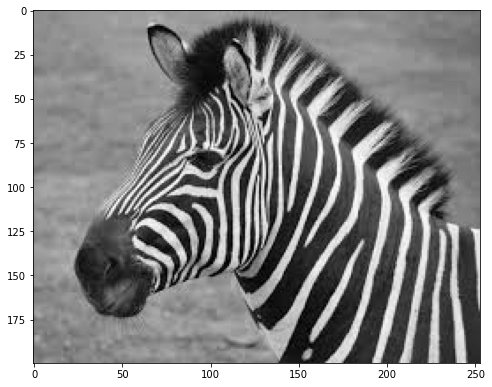

In [60]:
img = cv2.imread('zebra.jpeg',0)
plt.imshow(img)


In [61]:
blur = cv2.GaussianBlur(img,(0,0),1)
Gx = cv2.filter2D(blur, cv2.CV_32F, Sx)
Gy = cv2.filter2D(blur, cv2.CV_32F, Sy)

G = np.sqrt(Gx**2 + Gy**2) 
theta = np.arctan2(Gy,Gx) / np.pi * 180

In [62]:
realGNMS = nms(G,theta)

Text(0.5, 1.0, 'G-NMS')

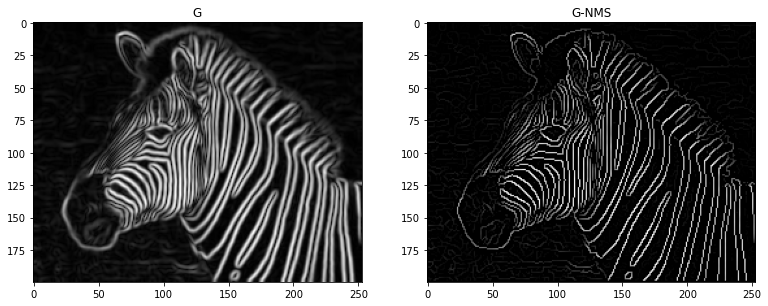

In [63]:
plt.figure(figsize=(20,16))
plt.subplot(1,3,1)
plt.imshow(G)
plt.title('G')

plt.subplot(1,3,2)
plt.imshow(realGNMS)
plt.title('G-NMS')

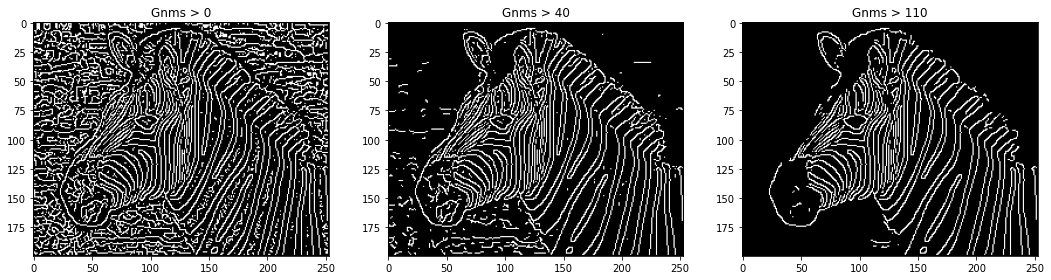

In [64]:
plt.figure(figsize=(18,8))

th0, low_th, high_th = 0, 40, 110

plt.subplot(1,3,1)
plt.imshow(realGNMS>th0)
plt.title(f'Gnms > {th0}')

plt.subplot(1,3,2)
plt.imshow(realGNMS>low_th)
plt.title(f'Gnms > {low_th}')

plt.subplot(1,3,3)
plt.imshow(realGNMS>high_th)
plt.title(f'Gnms > {high_th}')

plt.show()

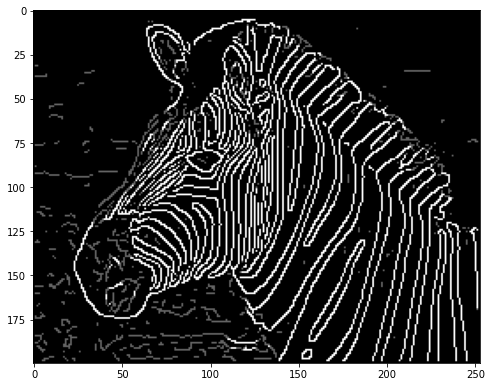

In [67]:
strong = (realGNMS>=high_th)
weak = (low_th<realGNMS)*(realGNMS<high_th)

M = np.zeros_like(G)
M[weak] = 100  
M[strong] = 255

plt.imshow(M)

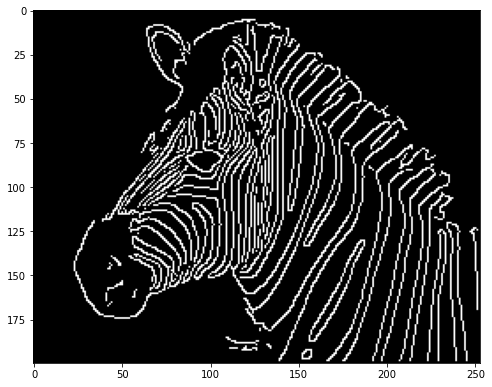

In [69]:
edges = thresh_and_link(realGNMS, low_th, high_th)
plt.imshow(edges)

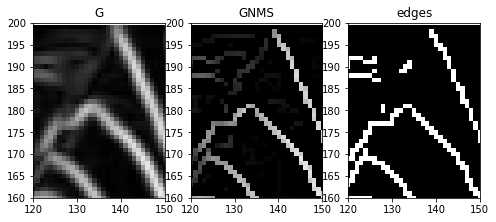

In [70]:
zoom=[120,150,160,200]
plt.subplot(131)
plt.imshow(G)
plt.title('G')
plt.axis(zoom)

plt.subplot(132)
plt.imshow(realGNMS)
plt.title('GNMS')
plt.axis(zoom)

plt.subplot(133)
plt.imshow(edges)
plt.title('edges')
plt.axis(zoom)
plt.show()